## Week 7: Python Programming
Bishesh Tamrakar


## Python Performance Tuning and Optimization

## Key Areas of Optimization
- Algorithmic Optimization
- Data Structure Selection
- Code Profiling and Analysis
- Memory Management
- Concurrency and Parallelism
- Using Built-in Libraries
## Algorithmic Optimization
- Algorithmic optimization is the process of improving the efficiency of algorithms
- Algorithmic optimization is used to reduce both the time complexity (execution time) or space complexity (memory usage())

## Memoization/dynamic programming Example

In [17]:
# define a Fibonacci Function
def fib_recursive(n): # time complexity(O(2^n))
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

fib_10  =fib_recursive(10)# we can't use this function to get the large number fib number
print(fib_10)  

# Initialize the memoization dictionary with base cases
memo = {0: 0, 1: 1} 
def fib_memo(n): # time complexity O(n)
    # Check if the result for 'n' is already in the memo dictionary
    if n in memo:
        return memo[n]
    
    # Recursive case: calculate Fibonacci number for n
    fib_number = fib_memo(n-1) + fib_memo(n-2)
    
    # Store the result in the memo dictionary to avoid redundant calculations
    memo[n] = fib_number
    
    return fib_number


print(fib_memo(100)) 

55
354224848179261915075


## Use Dict/Set (Hashmaps) to optimize the search

In [18]:
# Linear Search
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return True
    return False

arr = [5, 2, 9, 1, 5, 6]
print(linear_search(arr, 5))  # Check that 5 is in give array or not O(n)

# Use Set to optimize the search O(1)
def optimized_search(arr, target):
    hash_set = set(arr)  
    return target in hash_set

arr = [5, 2, 9, 1, 5, 6]
print(optimized_search(arr, 5))

True
True


## use build in libraries

In [19]:
import math
from collections import deque, Counter

# Custom implementation
def custom_sqrt(x):
    return x ** 0.5

# Optimized using math.sqrt() 
def optimized_sqrt(x):
    return math.sqrt(x)

# Custom factorial 
def custom_factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Optimized using math.factorial()
print(math.factorial(10)) 


## collection


# Using deque for fast append and pop operations
queue = deque([1, 2, 3])
queue.append(4)      # O(1)
queue.popleft()      # O(1)
print(queue)         # Output: deque([2, 3, 4])

# Using Counter for counting elements
words = ["apple", "banana", "apple", "orange", "banana", "apple"]
word_count = Counter(words)
print(word_count)

3628800
deque([2, 3, 4])
Counter({'apple': 3, 'banana': 2, 'orange': 1})


### Homework
- Explore itertools  for memory efficient iteration tasks

### Use functools.lru_cache for Memoization
- LRU (least recently used)

In [20]:
from functools import lru_cache

@lru_cache(maxsize=None)  # Cache all results
def fibonacci(n):
    if n < 2:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

print(fibonacci(50))

12586269025


## Reference Counting
- In Python, reference counting is used to track how many references exist for each object in memory
- The reference count is managed by by Python's memory management system.
- sys.getrefcount() to count the reference of an object

In [21]:
import sys

def reference_count_example():
    a = []  
    print(f"Reference count for 'a': {sys.getrefcount(a)}")

    b = a  # 'b' references the same list object
    print(f"Reference count for 'a' after assigning b = a: {sys.getrefcount(a)}")
    print(f"Reference count for 'b': {sys.getrefcount(b)}")

    c = b  # 'c' references the same list object
    print(f"Reference count for 'a' after assigning c = b: {sys.getrefcount(a)}")
    print(f"Reference count for 'b' after assigning c = b: {sys.getrefcount(b)}")
    print(f"Reference count for 'c': {sys.getrefcount(c)}")

    # Now, deleting the references
    del b
    print(f"Reference count for 'a' after deleting 'b': {sys.getrefcount(a)}")

    del c
    print(f"Reference count for 'a' after deleting 'c': {sys.getrefcount(a)}")

reference_count_example()

Reference count for 'a': 2
Reference count for 'a' after assigning b = a: 3
Reference count for 'b': 3
Reference count for 'a' after assigning c = b: 4
Reference count for 'b' after assigning c = b: 4
Reference count for 'c': 4
Reference count for 'a' after deleting 'b': 3
Reference count for 'a' after deleting 'c': 2


## Global Interpreter Lock (GIL)
GIL limits multi-threaded performance in CPU-bound tasks

In [22]:
import threading
import time

def sum_of_squares(n):
    total = sum(i * i for i in range(n))
    print(f"Sum of squares up to {n}: {total}")

# Measure time for multi-threaded execution
def threaded_execution():
    threads = []
    start_time = time.time()
    # Create threads
    for _ in range(2):
        t = threading.Thread(target=sum_of_squares, args=(10_000_000,))
        threads.append(t)
        t.start()
    
    # Wait for all threads to complete
    for t in threads:
        t.join()

    print(f"Time taken (threads): {time.time() - start_time:.2f} seconds")

# Measure time for single-threaded execution
def single_threaded_execution():
    start_time = time.time()
    sum_of_squares(10_000_000)
    sum_of_squares(10_000_000)
    print(f"Time taken (single thread): {time.time() - start_time:.2f} seconds")

print("Running with Threads:")
threaded_execution()
print("\nRunning Single-Threaded:")
single_threaded_execution()

Running with Threads:


Sum of squares up to 10000000: 333333283333335000000
Sum of squares up to 10000000: 333333283333335000000
Time taken (threads): 3.87 seconds

Running Single-Threaded:
Sum of squares up to 10000000: 333333283333335000000
Sum of squares up to 10000000: 333333283333335000000
Time taken (single thread): 3.55 seconds


## Home Work
- Searching for elements in a collection (Use Dict)

    - Write a function so that from a given list of length n, if n element exists on the list return True, else False
- Queue-based problems

- FIFO and LIFO (use deque from collection)
    - Task: Simulate FIFO and LIFO queue with list and with deuq and profile

In [23]:
def element_exists(lst, n):

    element_dict = {element: True for element in lst}
    return element_dict.get(n, False)

my_list = [1, 2, 3, 4, 5]
print(element_exists(my_list, 3))  
print(element_exists(my_list, 6)) 

from collections import deque

def fifo_lifo_simulation():
    operations = 5
    data = list(range(operations))
    
    fifo_list = []
    for item in data:
        fifo_list.append(item)
        print(fifo_list) 
    while fifo_list:
        fifo_list.pop(0) 
        print(fifo_list)


    fifo_deque = deque()
    for item in data:
        fifo_deque.append(item)  # Enqueue
        print(fifo_deque)
    while fifo_deque:
        fifo_deque.popleft()  # Dequeue
        print(fifo_deque)



    lifo_list = []
    for item in data:
        lifo_list.append(item)  # Push
        print(lifo_list)
    while lifo_list:
        lifo_list.pop()  # Pop
        print(lifo_list)


    lifo_deque = deque()
    for item in data:
        lifo_deque.append(item)  # Push
        print(lifo_deque)
    while lifo_deque:
        lifo_deque.pop()  # Pop
        print(lifo_deque)

# Running the simulation
fifo_lifo_simulation()


True
False
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[1, 2, 3, 4]
[2, 3, 4]
[3, 4]
[4]
[]
deque([0])
deque([0, 1])
deque([0, 1, 2])
deque([0, 1, 2, 3])
deque([0, 1, 2, 3, 4])
deque([1, 2, 3, 4])
deque([2, 3, 4])
deque([3, 4])
deque([4])
deque([])
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 2]
[0, 1]
[0]
[]
deque([0])
deque([0, 1])
deque([0, 1, 2])
deque([0, 1, 2, 3])
deque([0, 1, 2, 3, 4])
deque([0, 1, 2, 3])
deque([0, 1, 2])
deque([0, 1])
deque([0])
deque([])


## HomeWork
- Task 1:From the Top 120 best-selling mobile datasets data perform following tasks:


- Download the top 120 best-selling mobile phones.csv CSV file

- Perform Data Cleaning

- Perform Data Visualization

    - Create a histogram of the Units Sold (million) column to visualize the distribution of units sold across all mobile models
    - Top Manufacturers:
        - Create a bar chart showing the top 10 manufacturers by total units sold
- Yearly Trends in Units Sold
    - Create a line plot showing the total units sold per year to visualize any trends over time
- Data Analysis

    - Find and display the top 10 mobile models with the highest units sold
    - Identify High-Selling Years for Each Manufacturer
- Clustering Mobile Models by Sales Performance

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
df = pd.read_csv('data/top 120 best-selling mobile phones.csv')
print (df.head())
# Data cleaning
print(df.isnull().sum())
print(df.duplicated().sum())

print(df.dtypes)


plt.hist(df['Units Sold (million )'], bins = 5, color='blue',edgecolor='black', alpha=0.7)
plt.title('Histogram of Units Sold (million)')
plt.xlabel('Units Sold (in million)')
plt.ylabel('Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


# Creating a bar chart to show the top 10 manufacturers by total units sold


plt.figure(figsize=(10,6))
plt.bar(df['Model'].head(10),df['Units Sold (million )'].head(10), color='yellow', edgecolor='black', alpha=0.7)
plt.title('Top 10 Manufacturers as per units sold')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Units Sold (in million)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Creating a line plot to show the units sold per year to visualize trends over time
total_units_per_year = df.groupby('Year')['Units Sold (million )'].sum().reset_index()
plt.figure(figsize=(15,6))
plt.plot(total_units_per_year['Year'],total_units_per_year['Units Sold (million )'], marker='o', color='red', linestyle='-', linewidth=2)
plt.title('Total Units Sold per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Units Sold (in million)',fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(total_units_per_year['Year'], fontsize=10)
plt.show()
# Identifying the high-selling years for each manufacturer
units_per_manufacturer_per_year = df.groupby(['Manufacturer','Year'])['Units Sold (million )'].sum().reset_index()

print(units_per_manufacturer_per_year)

high_selling_year_per_manufacturer = units_per_manufacturer_per_year.loc[
        units_per_manufacturer_per_year.groupby('Manufacturer')['Units Sold (million )'].idxmax()
    ]
print(high_selling_year_per_manufacturer)
clustering_data = df[['Units Sold (million )']]
# Scale the data (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters (n_clusters)
df['Cluster'] = kmeans.fit_predict(scaled_data)
# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Units Sold (million )'], [1]*len(df), c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering of Mobile Models Based on Sales')
plt.xlabel('Units Sold (million)')
plt.yticks([])  
plt.colorbar(label='Cluster')
plt.show()
print("Cluster Centers (mean sales per cluster):")
print(scaler.inverse_transform(kmeans.cluster_centers_))

FileNotFoundError: [Errno 2] No such file or directory: 'data/top 120 best-selling mobile phones.csv'

## HomeWork
- Task 2:From the binance datasets data perform following tasks
- Download the binance-dataset.csv CSV file
- Perform Data Cleaning and Manipulation

### Handle missing data
- Convert open_time, close_time, open_time_utc, close_time_utc to datetime format
- Perform Data Visualization

- Plot a line graph showing the closing price (close) over time
- Create a line plot showing the total trading volume (volume) over time to visualize market activity and trading volume
## Data Analysis
- Identify the date and time when the maximum and minimum closing prices occurred
- Calculate the average volume traded by the day of the week and create a bar plot
- Build Linear Regression to Predict Closing Price using open, high,low and volume

       open_time     open     high      low    close        volume  \
0  1652400000000  0.00032  0.00049  0.00031  0.00047  4.032332e+08   
1  1652400060000  0.00047  0.00055  0.00042  0.00049  3.467135e+08   
2  1652400120000  0.00049  0.00052  0.00048  0.00051  2.064851e+08   
3  1652400180000  0.00052  0.00059  0.00051  0.00058  2.723594e+08   
4  1652400240000  0.00057  0.00060  0.00032  0.00035  5.888936e+08   

      close_time  quote_asset_volume  number_of_trades  \
0  1652400059999       163509.572433              1276   
1  1652400119999       171487.017111              1691   
2  1652400179999       103019.589015               976   
3  1652400239999       152790.423528              1163   
4  1652400299999       258685.424191              2566   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  \
0                 2.233801e+08                  89172.973422       0   
1                 1.722357e+08                  85252.153831       0   
2             

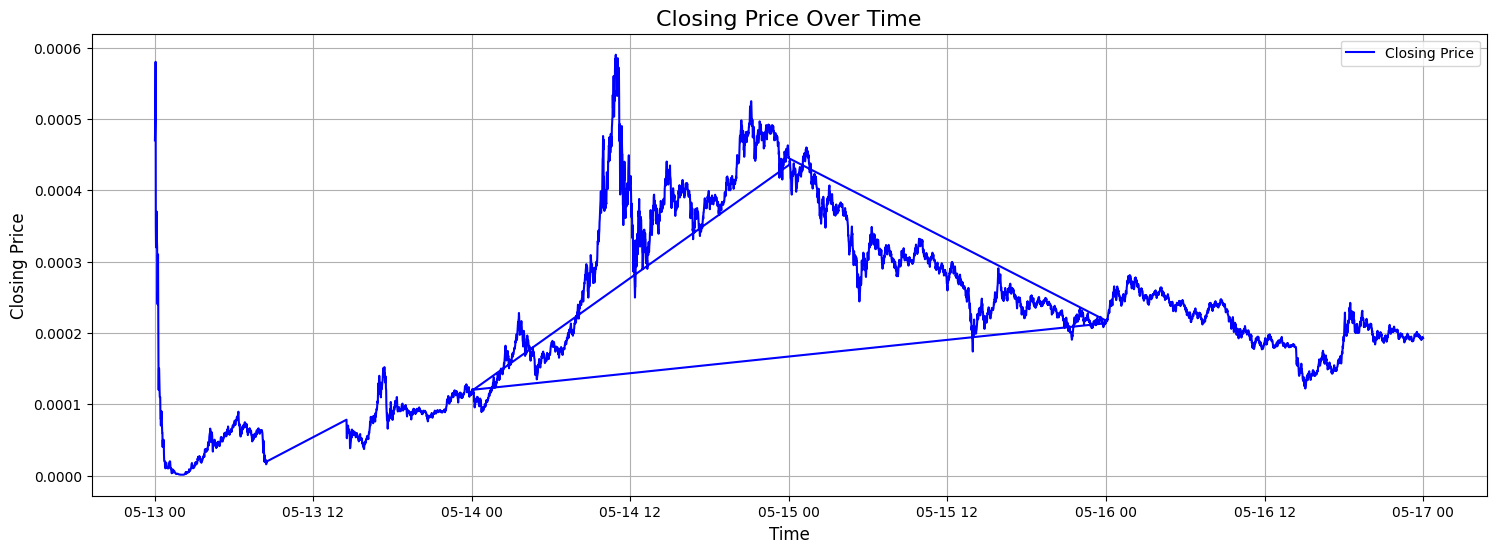

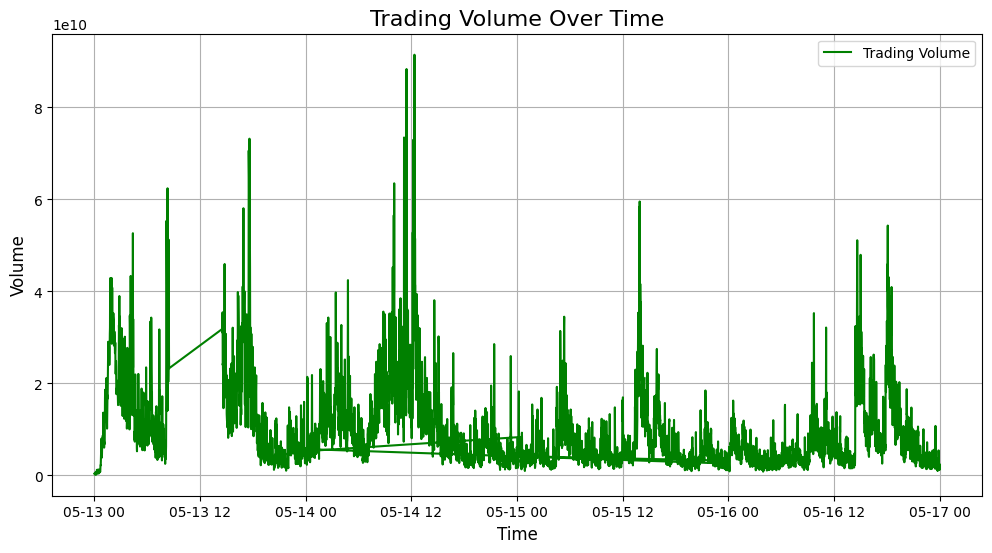

Maximum Closing Price:
close                            0.00059
close_time    2022-05-14 10:53:59.999000
Name: 3173, dtype: object

Minimum Closing Price:
close                           0.000001
close_time    2022-05-13 02:00:59.999000
Name: 120, dtype: object


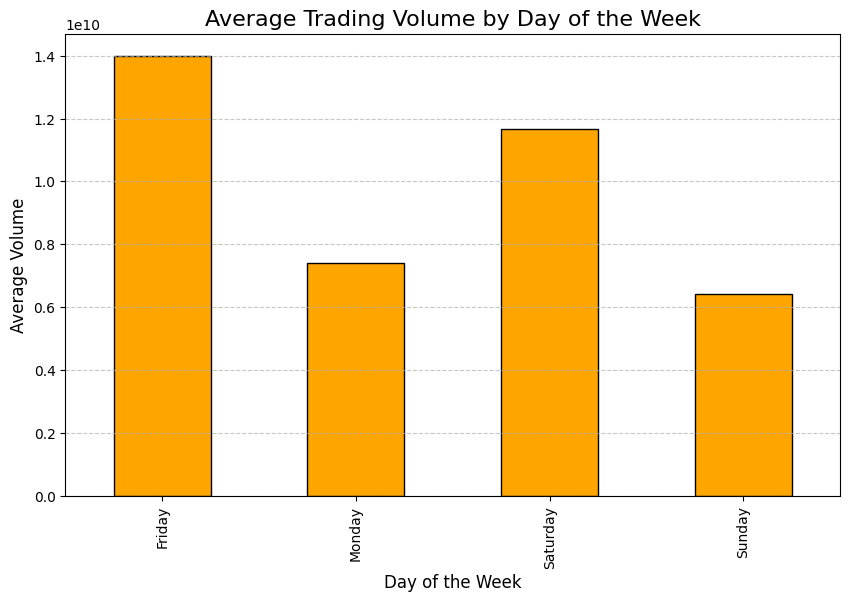

Mean Squared Error: 1.0771096274995181e-11
RMSE: 3.2819348371037445e-06
R²: 0.999279883066799


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
data = pd.read_csv('data/binance-dataset.csv')
print (data.head())
# Converting timestamps to datetime format
data['open_time'] = pd.to_datetime(data['open_time'], unit='ms')
data['close_time'] = pd.to_datetime(data['close_time'], unit='ms')
data['open_time_utc'] = pd.to_datetime(data['open_time_utc'])
data['close_time_utc'] = pd.to_datetime(data['close_time_utc'])
data = data.dropna()
data.info()
# Plot closing price over time
plt.figure(figsize=(18, 6))
plt.plot(data['close_time'], data['close'], label='Closing Price',color='blue')
plt.title('Closing Price Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data['close_time'], data['volume'], label='Trading Volume', color='green')
plt.title('Trading Volume Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend()
plt.grid()
plt.show()
max_close = data.loc[data['close'].idxmax()]
min_close = data.loc[data['close'].idxmin()]
print("Maximum Closing Price:")
print(max_close[['close', 'close_time']])
print("\nMinimum Closing Price:")
print(min_close[['close', 'close_time']])
data['day_of_week'] = data['close_time'].dt.day_name()
avg_volume_by_day = data.groupby('day_of_week')['volume'].mean().sort_index()
plt.figure(figsize=(10, 6))
avg_volume_by_day.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Trading Volume by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Volume', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# Features and target
X = data[['open', 'high', 'low', 'volume']]
y = data['close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

